In [1]:
import pandas as pd
# 2. numpy : Python library hels accesss the mathematical functions ,etc.
import numpy as np
# 3. matplotlib : build upon the numpy module helps to plot various graphs
import matplotlib.pyplot as plt 
# 4. tensorflow : important module which helps to work with image data set also has keras to use layering properties
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential
import cv2

DATA PREPROCESSING

In [2]:
dataset_path=r"C:\Users\DHANSHRI\Desktop\Classification\Bones"

In [3]:
dataset=ds_validation= tf.keras.utils.image_dataset_from_directory(
    dataset_path)

Found 448 files belonging to 8 classes.


In [4]:
ds_train= tf.keras.utils.image_dataset_from_directory(
    dataset_path,#path of folder
    subset="training",
    validation_split=0.2,
    seed=123
)

Found 448 files belonging to 8 classes.
Using 359 files for training.


In [5]:
ds_validation= tf.keras.utils.image_dataset_from_directory(
    dataset_path,#path of folder
    subset="validation",
    validation_split=0.2,
    seed=123
)

Found 448 files belonging to 8 classes.
Using 89 files for validation.


In [6]:
import tensorflow_datasets as tfds
batch_size=64
dataset_name=dataset
class_names=dataset.class_names
print(class_names)

c:\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Pelvic Gridle', 'Ribs', 'Skull', 'Vertebrae', 'auditory ossicles', 'clavicle', 'femur', 'phalanges']


In [7]:
size=(512,512)
ds_train=ds_train.map(lambda image,label:(tf.image.resize(image,size),label))
ds_val=ds_train.map(lambda image,label:(tf.image.resize(image,size),label))

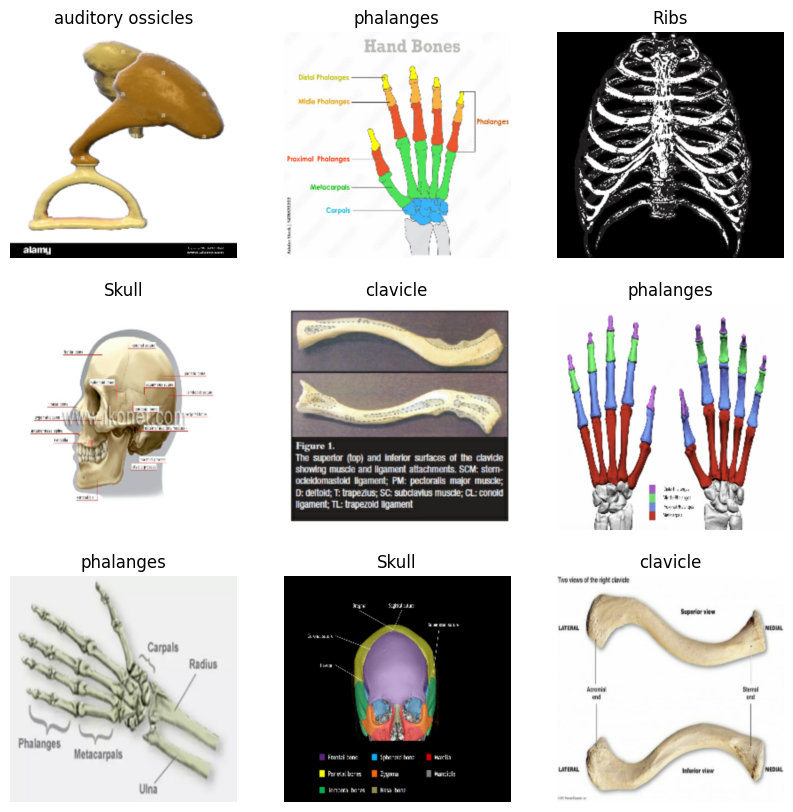

In [8]:
plt.figure(figsize=(10,10))
for images,labels in ds_train.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [10]:
image =Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,0.3),interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1,width_factor=0.1)

    ],
    name="image"
)

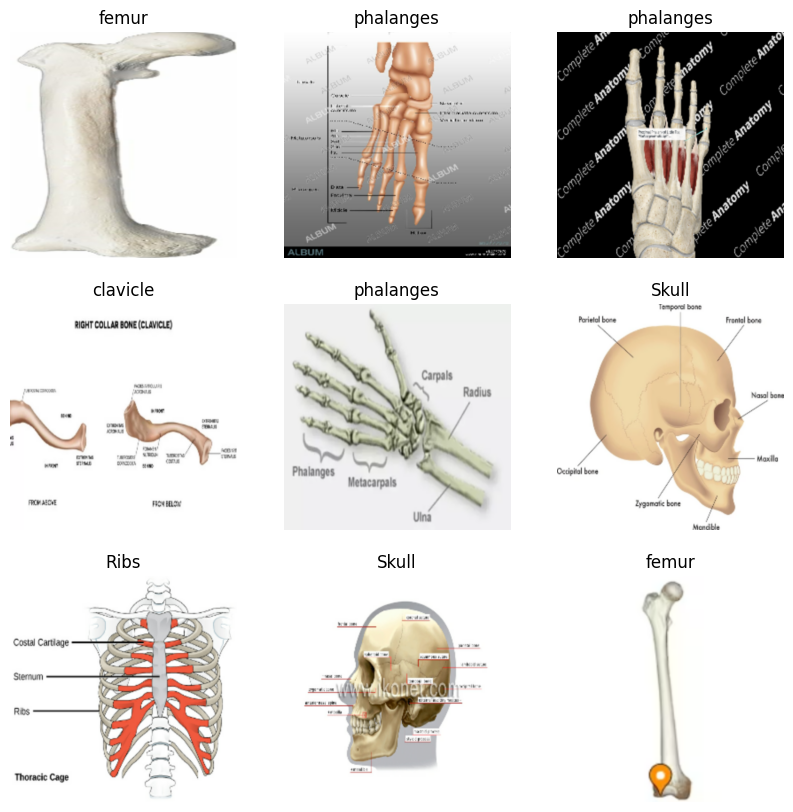

In [11]:
plt.figure(figsize=(10,10))
for images,labels in ds_train.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
image =Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,0.3),interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1,width_factor=0.1)

    ],
    name="image"
)

In [13]:
import glob
for filename in glob.glob(r"C:\Users\DHANSHRI\Desktop\Classification\Bones/*jpg"):
    inp_image = cv2.imread(filename)
    img_gray=cv2.cvtColor(inp_image,cv2.COLOR_BGR2GRAY)
    cv2.imshow(img_gray)

In [19]:
# import os
# from PIL import Image

# ORIGIN_PATH = r"C:\Users\DHANSHRI\Desktop\Classification\Bones"
# DESTIN_PATH = r"C:\Users\DHANSHRI\Desktop\Classification\Bones1"

# for filename in os.listdir(ORIGIN_PATH):
#       # Construct full paths for the original and destination images
#         origin_image_path = os.path.join(ORIGIN_PATH, filename)
#         destin_image_path = os.path.join(DESTIN_PATH, filename)
#         for i in os.listdir(origin_image_path):
#             origin_image_path1 = os.path.join(origin_image_path,i)
#             destin_image_path1 = os.path.join(destin_image_path, i)
#                # Open the image file
#             with Image.open(origin_image_path1) as img:
#                 # Convert the image to grayscale
#                 grayscale_img = img.convert("L")
#                 # Save the converted image to the destination directory
#                 grayscale_img.save(destin_image_path1)


c:\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
# import os
# from PIL import Image
# from rembg import remove

# ORIGIN_PATH = r"C:\Users\DHANSHRI\Desktop\Classification\Bones1"
# DESTIN_PATH = r"C:\Users\DHANSHRI\Desktop\Classification\Bones2"

# for filename in os.listdir(ORIGIN_PATH):
#       # Construct full paths for the original and destination images
#         origin_image_path = os.path.join(ORIGIN_PATH, filename)
#         destin_image_path = os.path.join(DESTIN_PATH, filename)
#         for i in os.listdir(origin_image_path):
#             origin_image_path1 = os.path.join(origin_image_path,i)
#             destin_image_path1 = os.path.join(destin_image_path, i)
#                # Open the image file
#             with Image.open(origin_image_path1) as img:
#                 # Convert the image to grayscale
#                 output = img.convert("L")
#                 output =remove(img)
#                 # Save the converted image to the destination directory
#                 output.save(destin_image_path1,format="PNG")


c:\Python\Python311\Lib\site-packages\rembg\sessions\base.py:52: RuntimeWarning: invalid value encountered in divide
  im_ary = im_ary / np.max(im_ary)
c:\Python\Python311\Lib\site-packages\rembg\sessions\u2net.py:44: RuntimeWarning: invalid value encountered in cast
  mask = Image.fromarray((pred * 255).astype("uint8"), mode="L")
